# Regression

This notebook covers multi-variate "linear regression". We'll be going over how to use the scikit-learn regression model, as well as how to train the regressor using the fit() method, and how to predict new labels using the predict() method. We'll be analyzing a data set consisting of house prices in Boston. 

If you're interested in the deeper mathematics of linear regession methods, check out the [wikipedia page](http://en.wikipedia.org/wiki/Linear_regression) and also check out Andrew Ng's wonderful lectures for free on [youtube](https://www.youtube.com/watch?v=5u4G23_OohI).

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style('whitegrid')
%matplotlib inline

We'll start by looking a an example of a dataset from scikit-learn. First we'll import our usual data analysis imports, then sklearn's built-in boston dataset.

You should always try to do a quick visualization fo the data you have. Let's go ahead an make a histogram of the prices.

In [6]:
from sklearn.datasets import load_boston

In [7]:
boston = load_boston()

In [11]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

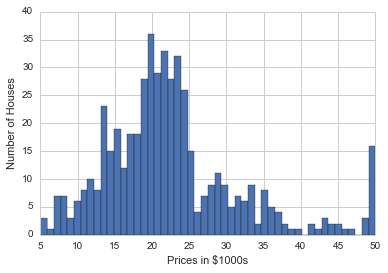

In [13]:
plt.hist(boston.target, bins=50)
plt.xlabel("Prices in $1000s")
plt.ylabel("Number of Houses")

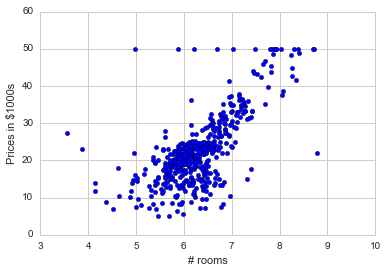

In [15]:
# the 5th column in "boston" dataset is "RM" (# rooms)
plt.scatter(boston.data[:,5], boston.target)
plt.ylabel("Prices in $1000s")
plt.xlabel("# rooms")

In [16]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['Price'] = boston.target
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


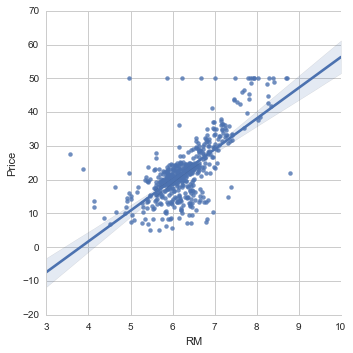

In [18]:
sns.lmplot('RM', 'Price', data=boston_df)

### Univariate Regression

We will start by setting up the X and Y arrays for numpy to take in. 

An **important note** for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number. In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So we'll need to create a (506,1) shape array. There are a few ways to do this, but an easy way to do this is by using numpy's built-in vertical stack tool, vstack.

In [29]:
# Set up X as median room values
X = boston_df.RM

# Use v to make X two-dimensional
X = np.vstack(boston_df.RM)

# Set up Y as the target price of the houses.
Y = boston_df.Price

In [86]:
type(X)

numpy.ndarray

In [87]:
type(Y)

pandas.core.series.Series

Let's import the [linear regression library](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the sklearn module.


The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

In [112]:
import sklearn
from sklearn.linear_model import LinearRegression

Next, we create a LinearRegression object, afterwards, type lm. then press tab to see the list of methods availble on this object.

In [113]:
# Create a LinearRegression Object
lreg = LinearRegression()

The functions we will be using are:

lreg.fit() which fits a linear model

lreg.predict() which is used to predict Y using the linear model with estimated coefficients

lreg.score() which returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, learn more about it [here](http://en.wikipedia.org/wiki/Coefficient_of_determination)





In [114]:
# Implement Linear Regression
lreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's go ahead check the intercept and number of coefficients.


In [115]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is -34.67 


In [116]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 1 


In [117]:
type(lreg.coef_)

numpy.ndarray

In [118]:
# Set a DataFrame from the Features
coeff_df = DataFrame(["Intercept", "Rooms"])
coeff_df.columns = ['Feature']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(np.append(lreg.intercept_, lreg.coef_))

# Show
coeff_df

,Feature,Coefficient Estimate
0,Intercept,-34.670621
1,Rooms,9.102109


With our X and Y, we now have the solution to the linear regression.

$$y=mx+b$$

where b = Intercept, and m is the Coefficient of Estimate for the feature "Rooms"

In [130]:
rooms = pd.Series([4], name="rooms")
X_test = pd.DataFrame(rooms)
X_test

,rooms
0,4


In [131]:
lreg.predict(X_test)

array([ 1.73781515])

### Multivariate Regression

Let's add more features to our prediction model.

In [91]:
# Data Columns
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df.Price

Finally, we're ready to pass the X and Y using the linear regression object.

In [92]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's go ahead check the intercept and number of coefficients.

In [93]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is 36.49 


In [94]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 13 


Great! So we have basically made an equation for a line, but instead of just oneo coefficient m and an intercept b, we now have 13 coefficients. To get an idea of what this looks like check out the [documentation](http://scikit-learn.org/stable/modules/linear_model.html) for this equation:
$$ y(w,x) = w_0 + w_1 x_1 + ... + w_p x_p $$

Where $$w = (w_1, ...w_p)$$ as the coefficients and $$ w_0 $$ as the intercept 

What we'll do next is set up a DataFrame showing all the Features and their estimated coefficients obtained form the linear regression.

In [95]:
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


Just like we initially plotted out, it seems the highest correlation between a feature and a house price was the number of rooms.

Now let's move on to Predicting prices!

### Training and Validation

In a dataset a training set is implemented to build up a model, while a validation set is used to validate the model built. Data points in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is *randomly*.

Fortunately, scikit learn has a built in function specifically for this called train_test_split.

The parameters passed are your X and Y, then optionally test_size parameter, representing the proportion of the dataset to include in the test split. As well a train_size parameter.  The default split is: 75% for training set and 25% for testing set.  You can learn more about these parameters [here](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

In [102]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = \
    sklearn.cross_validation.train_test_split(X_multi,Y_target)

Let's go ahead and see what the output of the train_test_split was:

In [103]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

((379, 13), (127, 13), (379,), (127,))


In [105]:
X_train.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
208,0.13587,0.0,10.59,1.0,0.489,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66
369,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73
109,0.26363,0.0,8.56,0.0,0.520,6.229,91.2,2.5451,5.0,384.0,20.9,391.23,15.55
146,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47


Great! Now that we have our training and testing sets we can continue on to predicint gprices based on the multiple variables.

### Prediction!

Now that we have our training and testing sets, let's go ahead and try to use them to predict house prices. We'll use our training set for the prediction and then use our testing set for validation.

In [106]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now run a prediction on both the X training set and the testing set.

In [107]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

Let's see if we can find the error in our fitted line. A common error measure is called "root mean squared error" (RMSE).  RMSE is similar to the standard deviation.  It is calculated by taking the square root of the sum of the square error and divide by the # elements.  Square error is the square of the sum of all differences between the prediction and the true value.

The root mean square error (RMSE) corresponds approximately to the standard deviation.  i.e., a prediction won't vary more than 2 times the RMSE 95% of the time. Note: Review the Normal Distribution Appendix lecture if this doesn't make sense to you or check out this [link](http://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule).

Now we will get the mean square error

In [108]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  \
      % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f" \
      % np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 20.74
Fit a model X_train, and calculate MSE with X_test and Y_test: 25.91


It looks like our mean square error between our training and testing was pretty close. But how do we actually visualize this?

### Visualizing Risiduals

In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual, so that:

$$Residual = Observed\:value - Predicted\:value $$

You can think of these residuals in the same way as the D value we discussed earlier, in this case however, there were multiple data points considered.

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Residual plots are a good way to visualize the errors in your data.  If you have done a good job then your data should be randomly scattered around line zero. If there is some strucutre or pattern, that means your model is not capturing some thing. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data. If this is the case go back to your model and check your data set closely.

So now let's go ahead and create the residual plot. For more info on the residual plots check out this great [link](http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis).

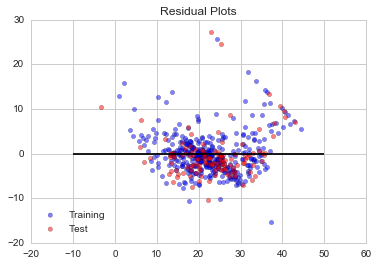

In [109]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

Great! Looks like there aren't any major patterns to be concerned about, it may be interesting to check out the line pattern at the top of the graph, but overall the majority of the residuals seem to be randomly allocated above and below the horizontal. We could also use seaborn to create these plots:

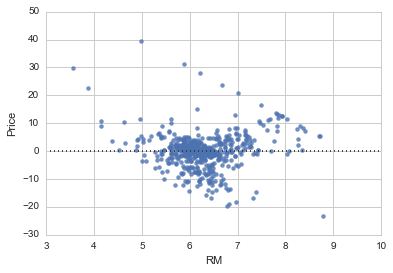

In [110]:
# Residual plot of all the dataset using seaborn
sns.residplot('RM', 'Price', data = boston_df)

Linear regression is a very broad topic, theres a ton of great information in the sci kit learn documentation, and I encourage you to check it out here:  http://scikit-learn.org/stable/modules/linear_model.html#linear-model